### Code to train a neural network based on our loggerbot's csv output

First we load the log file in csv format.  This assumes our columns are stored in the order exactly as below, and also that there is no contamination (e.g. other print statements) in the csv file:

In [1]:
import pandas as pd
df0=pd.read_csv("FredBot.log",names=["Turn","Try","PlayerID","PlayerName","MissionsBeenOn","FailedMissionsBeenOn","VotedUp0","VotedUp1","VotedUp2","VotedUp3","VotedUp4","VotedUp5","VotedDown0","VotedDown1","VotedDown2","VotedDown3","VotedDown4","VotedDown5","Spy"])

In [2]:
print(df0.head())

   Turn  Try  PlayerID  PlayerName  MissionsBeenOn  FailedMissionsBeenOn  \
0     1    1         0  Logicalton               0                     0   
1     2    1         0  Logicalton               1                     1   
2     2    2         0  Logicalton               1                     1   
3     3    1         0  Logicalton               1                     1   
4     1    1         1     FredBot               0                     0   

   VotedUp0  VotedUp1  VotedUp2  VotedUp3  VotedUp4  VotedUp5  VotedDown0  \
0         1         0         0         0         0         0           0   
1         1         0         0         0         0         0           0   
2         1         0         0         0         0         0           0   
3         1         1         0         0         0         0           0   
4         1         0         0         0         0         0           0   

   VotedDown1  VotedDown2  VotedDown3  VotedDown4  VotedDown5  Spy  
0          

In [3]:
df=df0.query("PlayerName in ['Bounder', 'Logicalton', 'Simpleton', 'Trickerton']")
print(df.head())

   Turn  Try  PlayerID  PlayerName  MissionsBeenOn  FailedMissionsBeenOn  \
0     1    1         0  Logicalton               0                     0   
1     2    1         0  Logicalton               1                     1   
2     2    2         0  Logicalton               1                     1   
3     3    1         0  Logicalton               1                     1   
8     1    1         2   Simpleton               0                     0   

   VotedUp0  VotedUp1  VotedUp2  VotedUp3  VotedUp4  VotedUp5  VotedDown0  \
0         1         0         0         0         0         0           0   
1         1         0         0         0         0         0           0   
2         1         0         0         0         0         0           0   
3         1         1         0         0         0         0           0   
8         1         0         0         0         0         0           0   

   VotedDown1  VotedDown2  VotedDown3  VotedDown4  VotedDown5  Spy  
0          

In [4]:
print(df.describe())

                Turn            Try       PlayerID  MissionsBeenOn  \
count  191708.000000  191708.000000  191708.000000   191708.000000   
mean        2.743235       1.202099       1.998221        0.842850   
std         1.279829       0.533607       1.416801        0.874854   
min         1.000000       1.000000       0.000000        0.000000   
25%         2.000000       1.000000       1.000000        0.000000   
50%         3.000000       1.000000       2.000000        1.000000   
75%         4.000000       1.000000       3.000000        1.000000   
max         5.000000       5.000000       4.000000        4.000000   

       FailedMissionsBeenOn       VotedUp0       VotedUp1       VotedUp2  \
count         191708.000000  191708.000000  191708.000000  191708.000000   
mean               0.506140       1.243975       0.461900       0.199094   
std                0.623288       0.690986       0.644781       0.477940   
min                0.000000       0.000000       0.000000       0

In [5]:
import numpy as np 
x_train=df.values[:,4:18].astype(np.float32)
y_train=df.values[:,18].astype(np.int32)
print(y_train.shape)
print(y_train[0:6])
print(x_train[0:6])
num_inputs=x_train.shape[1]
num_outputs=2

(191708,)
[0 0 0 0 0 0]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [6]:
dataset_size=len(x_train)
train_set_size=int(dataset_size*0.6)
x_val,y_val=x_train[train_set_size:],y_train[train_set_size:]
x_train,y_train=x_train[:train_set_size],y_train[:train_set_size]

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(name="my_neural_network")
layer1=layers.Dense(12, activation="relu", input_shape=(num_inputs,))
model.add(layer1)
layer2=layers.Dense(12, activation="relu")
model.add(layer2)
layer3=layers.Dense(12, activation="relu")
model.add(layer3)
layer4=layers.Dense(12, activation="relu")
model.add(layer4)
layer5=layers.Dense(num_outputs, activation="softmax")
model.add(layer5)

print(model(x_train[0:5]))

tf.Tensor(
[[0.48803967 0.5119604 ]
 [0.48689905 0.5131009 ]
 [0.55958194 0.440418  ]
 [0.5464086  0.45359135]
 [0.48803964 0.5119604 ]], shape=(5, 2), dtype=float32)


In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(0.00001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics='accuracy'
)

In [9]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=144,
    validation_data=(x_val, y_val),verbose=1
)

Epoch 1/144
3595/3595 [==============================] - 4s 968us/step - loss: 0.6691 - accuracy: 0.5890 - val_loss: 0.6629 - val_accuracy: 0.5997
Epoch 2/144
3595/3595 [==============================] - 3s 918us/step - loss: 0.6594 - accuracy: 0.5991 - val_loss: 0.6559 - val_accuracy: 0.5988
Epoch 3/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.6521 - accuracy: 0.6013 - val_loss: 0.6482 - val_accuracy: 0.6030
Epoch 4/144
3595/3595 [==============================] - 4s 977us/step - loss: 0.6429 - accuracy: 0.6102 - val_loss: 0.6375 - val_accuracy: 0.6188
Epoch 5/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.6309 - accuracy: 0.6259 - val_loss: 0.6238 - val_accuracy: 0.6295
Epoch 6/144
3595/3595 [==============================] - 5s 1ms/step - loss: 0.6158 - accuracy: 0.6369 - val_loss: 0.6072 - val_accuracy: 0.6434
Epoch 7/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5987 - accuracy: 0.6531 - val_loss: 0.5896 - 

3595/3595 [==============================] - 4s 1ms/step - loss: 0.5289 - accuracy: 0.7070 - val_loss: 0.5278 - val_accuracy: 0.7053
Epoch 58/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5288 - accuracy: 0.7068 - val_loss: 0.5276 - val_accuracy: 0.7057
Epoch 59/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5286 - accuracy: 0.7071 - val_loss: 0.5275 - val_accuracy: 0.7058
Epoch 60/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5285 - accuracy: 0.7070 - val_loss: 0.5273 - val_accuracy: 0.7059
Epoch 61/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5283 - accuracy: 0.7067 - val_loss: 0.5272 - val_accuracy: 0.7058
Epoch 62/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5282 - accuracy: 0.7070 - val_loss: 0.5270 - val_accuracy: 0.7058
Epoch 63/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5280 - accuracy: 0.7070 - val_loss: 0.5269 - val_accuracy

3595/3595 [==============================] - 4s 1ms/step - loss: 0.5231 - accuracy: 0.7092 - val_loss: 0.5224 - val_accuracy: 0.7082
Epoch 114/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5230 - accuracy: 0.7095 - val_loss: 0.5223 - val_accuracy: 0.7082
Epoch 115/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5230 - accuracy: 0.7095 - val_loss: 0.5223 - val_accuracy: 0.7077
Epoch 116/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5229 - accuracy: 0.7095 - val_loss: 0.5222 - val_accuracy: 0.7084
Epoch 117/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5228 - accuracy: 0.7094 - val_loss: 0.5223 - val_accuracy: 0.7082
Epoch 118/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5228 - accuracy: 0.7094 - val_loss: 0.5221 - val_accuracy: 0.7083
Epoch 119/144
3595/3595 [==============================] - 4s 1ms/step - loss: 0.5227 - accuracy: 0.7094 - val_loss: 0.5220 - val_ac

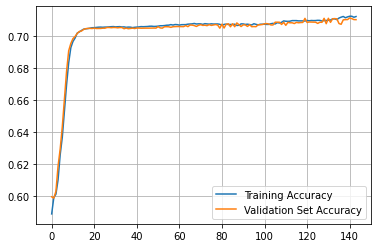

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Set Accuracy")
plt.legend()
plt.grid()

In [11]:
print(y_train.mean())

0.40156836834052023


maximum_turn 5
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64) [0.71118575, 0.7229861, 0.73597044, 0.7508768, 0.75807]


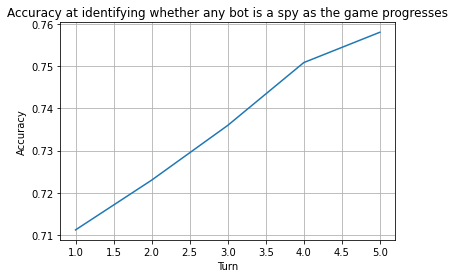

In [12]:
accuracy_by_turn=[]
maximum_turn=df['Turn'].max()
accuracy_metric=tf.keras.metrics.Accuracy()
print("maximum_turn",maximum_turn)
for turn in range(1,maximum_turn+1):
    df_restricted=df.query('Turn>='+str(turn))
    x=df_restricted.values[:,4:18].astype(np.float32)
    y=df_restricted.values[:,18].astype(np.int32)
    y_guess=model(x)
    y_guess=tf.argmax(y_guess,axis=1)
    accuracy=accuracy_metric(y_guess,y)
    accuracy_by_turn.append(accuracy.numpy())
print(tf.range(maximum_turn),accuracy_by_turn)
plt.plot(tf.range(1,1+len(accuracy_by_turn)),accuracy_by_turn)
plt.title('Accuracy at identifying whether any bot is a spy as the game progresses')
plt.xlabel('Turn')
plt.ylabel('Accuracy')
plt.grid()

In [13]:
model.save('fredbot_classifier')

INFO:tensorflow:Assets written to: fredbot_classifier\assets
